# HW6 by Prathamesh Uravane UID-122016187
## Q2


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering

In [2]:
#Import data
df=pd.read_csv('Data_Iris.csv')

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
species_name          3
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,1.000000,NaN
std,0.828066,0.435866,1.765298,0.762238,0.819232,NaN
min,4.300000,2.000000,1.000000,0.100000,0.000000,NaN
25%,5.100000,2.800000,1.600000,0.300000,0.000000,NaN
50%,5.800000,3.000000,4.350000,1.300000,1.000000,NaN
75%,6.400000,3.300000,5.100000,1.800000,2.000000,NaN


In [7]:
#labels
y=df['species_name']
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Text(0.5, 1.0, 'Number of flowers in eact category')

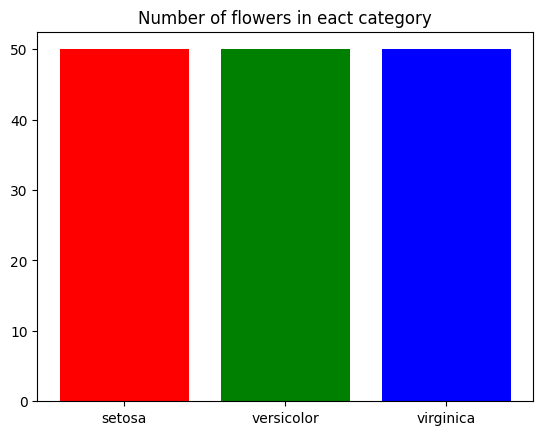

In [8]:
#plot graph
plt.bar(['setosa', 'versicolor', 'virginica'],[len(y[y=='setosa']),len(y[y=='versicolor']),len(y[y=='virginica'])],color=['red','green','blue'])
plt.title('Number of flowers in eact category')

In [9]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'species_name'],
      dtype='object')

In [10]:
#Labels
X = df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
y=df['species_name']


In [11]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [12]:
print('\n# of feeature samples: ', len(X))
print('# of Label samples: ', len(y), '\n')


# of feeature samples:  150
# of Label samples:  150 



Text(0.5, 0.92, '3D Scatter Plot of Iris Features')

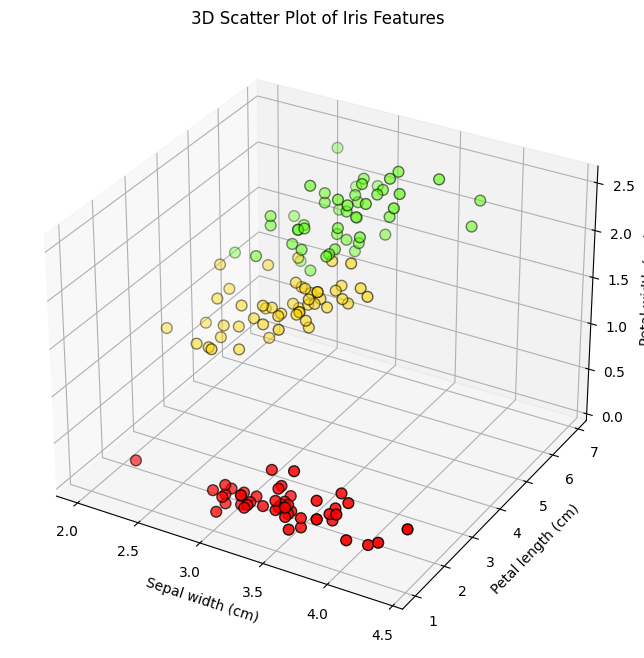

In [13]:
# Create 3D scatter plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X[:, 0], X[:, 1], X[:, 2],
    c=y_encoded, cmap='prism', edgecolors='k', s=60
)
ax.set_xlabel('Sepal width (cm)')
ax.set_ylabel('Petal length (cm)')
ax.set_zlabel('Petal width (cm)')
ax.set_title('3D Scatter Plot of Iris Features')

### (a) KMeans

In [14]:
kmeans = KMeans(n_clusters=3, max_iter=500, random_state=42)    
# Train the kmean models and print out the centroids
kmeans.fit(X)

C:\Users\upratham\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=3, random_state=42)

In [15]:
centroids=kmeans.cluster_centers_
print('Centroids: \n', centroids)
print('\nNumber of samples in each cluster')
print('label 0: ', (kmeans.labels_ == 0).sum())
print('Label 1: ', (kmeans.labels_ == 1).sum())
print('Lable 2: ', (kmeans.labels_ == 2).sum())

Centroids: 
 [[3.00204082 5.57959184 2.03265306]
 [3.428      1.462      0.246     ]
 [2.74705882 4.25882353 1.33333333]]

Number of samples in each cluster
label 0:  49
Label 1:  50
Lable 2:  51


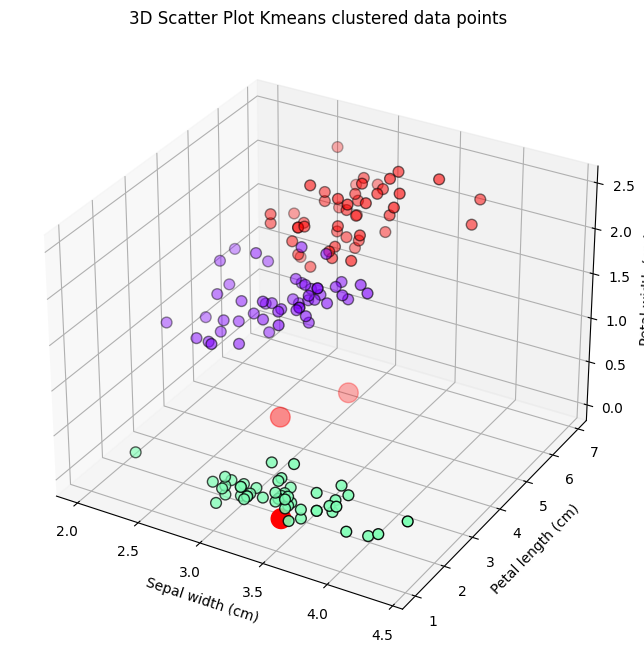

In [16]:
# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X[:, 0], X[:, 1], X[:, 2],
    c=kmeans.labels_, cmap='rainbow_r', edgecolors='k', s=60
)

ax.set_xlabel('Sepal width (cm)')
ax.set_ylabel('Petal length (cm)')
ax.set_zlabel('Petal width (cm)')
ax.set_title('3D Scatter Plot Kmeans clustered data points')
ax.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red')

### (b) agglomerative hierarchical clustering

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='ward', metric='euclidean')
#print('Linkage output: \n', Z)
np.savetxt('linkage_matrix.txt', Z, fmt='%d', delimiter=',')

Text(42.097222222222214, 0.5, 'Distance')

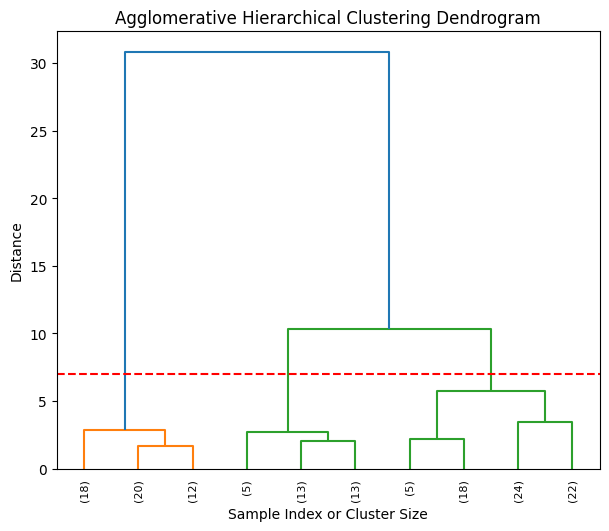

In [18]:
# the dendrogram
plt.figure(figsize=(6, 5))
dendrogram(
    Z,
    leaf_rotation=90.,  # Rotate the leaf labels
    leaf_font_size=8.,  # Set font size for labels
    truncate_mode='lastp',  # Show only the last 'p' merged clusters
    p=10,  # Show 10 leaves
    show_leaf_counts=True # Show the number of points in each leaf
)
plt.axhline(y=7, color='r', linestyle='--') # Add a horizontal line to visualize the cut
plt.tight_layout()
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')


In [19]:
#(AHC) model with 3 clusters
ahc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

In [20]:
cluster_labels = ahc.fit_predict(X)

In [21]:
unique, counts = np.unique(cluster_labels, return_counts=True)
print(f"Cluster sizes: {dict(zip(unique, counts))}")

Cluster sizes: {0: 69, 1: 50, 2: 31}


Text(0.5, 0.92, '3D Scatter Plot Kmeans clustered data points')

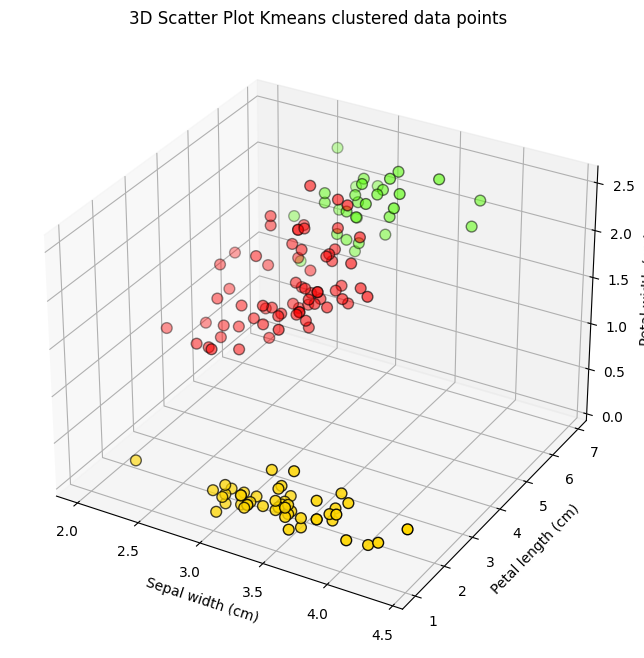

In [22]:
# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X[:, 0], X[:, 1], X[:, 2],
    c=cluster_labels, cmap='prism', edgecolors='k', s=60
)

ax.set_xlabel('Sepal width (cm)')
ax.set_ylabel('Petal length (cm)')
ax.set_zlabel('Petal width (cm)')
ax.set_title('3D Scatter Plot Kmeans clustered data points')